# Mini project

Build a machine learning model that predicts the type of people who survived the Titanic shipwreck using passenger data (i.e. name, age, gender, socio-economic class, etc.). Dataset Link: https://www.kaggle.com/competitions/titanic/data


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
median_value = df['Age'].median()
df['Age'].fillna(median_value,inplace=True)
df.dropna(inplace=True)

[]

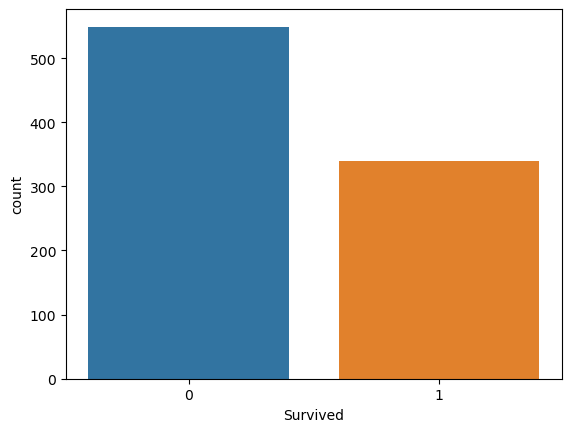

In [8]:
sns.countplot(x=df['Survived'])
plt.plot()

[]

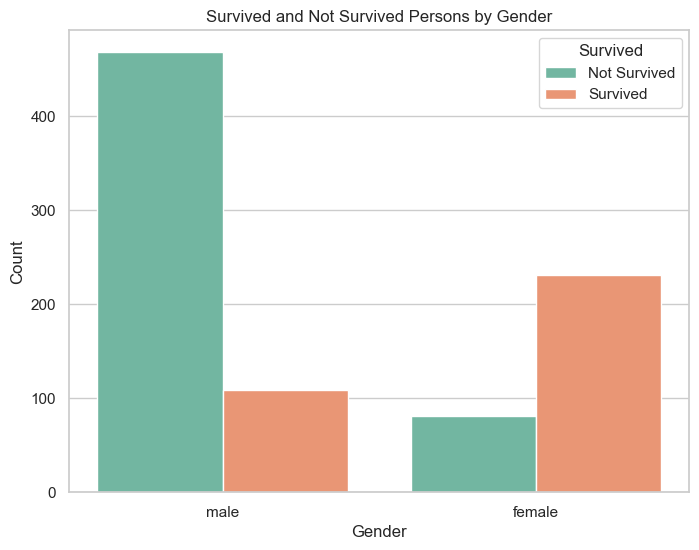

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette="Set2")
plt.title('Survived and Not Survived Persons by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.plot()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [11]:
df_encoded = pd.get_dummies(data=df,columns=['Sex','Embarked'],drop_first=True)

In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   Sex_male    889 non-null    uint8  
 7   Embarked_Q  889 non-null    uint8  
 8   Embarked_S  889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [13]:
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [14]:
y = df_encoded['Survived']
X = df_encoded.drop(columns=['Survived'])

In [15]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [16]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
score_dtc = accuracy_score(y_test,y_pred)
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred))

Confusion Matrix
[[89 23]
 [22 44]]
Accuracy Score: 0.7471910112359551
Recall Score: 0.6666666666666666
F1 Score: 0.6616541353383459
Precision Score: 0.6567164179104478


In [17]:
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
score_knn = accuracy_score(y_test,y_pred)
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred))

Confusion Matrix
[[96 16]
 [34 32]]
Accuracy Score: 0.7191011235955056
Recall Score: 0.48484848484848486
F1 Score: 0.5614035087719298
Precision Score: 0.6666666666666666


In [18]:
gbc=GradientBoostingClassifier(n_estimators=200)
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
score_gbc = accuracy_score(y_test,y_pred)
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred))

Confusion Matrix
[[100  12]
 [ 20  46]]
Accuracy Score: 0.8202247191011236
Recall Score: 0.696969696969697
F1 Score: 0.7419354838709677
Precision Score: 0.7931034482758621


In [19]:
r_mod = LogisticRegression()
r_mod.fit(X_train,y_train)
y_pred = r_mod.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
score_r = accuracy_score(y_test,y_pred)
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred))

Confusion Matrix
[[100  12]
 [ 20  46]]
Accuracy Score: 0.8202247191011236
Recall Score: 0.696969696969697
F1 Score: 0.7419354838709677
Precision Score: 0.7931034482758621


# Result

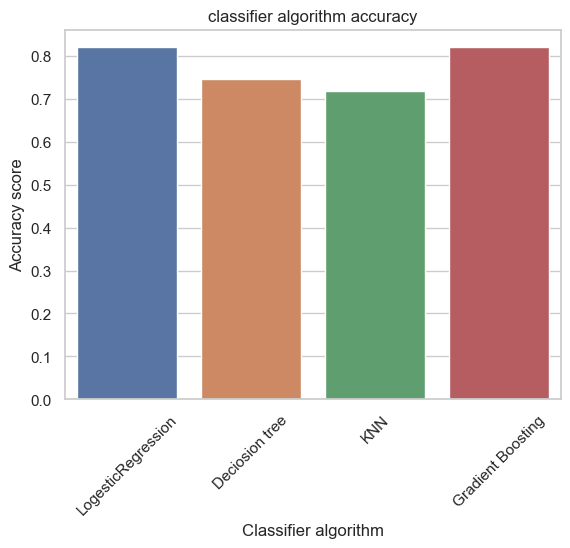

In [20]:
categorie = ["LogesticRegression","Deciosion tree","KNN","Gradient Boosting"]
values = [score_r,score_dtc,score_knn,score_gbc]
sns.barplot(x = categorie,y=values)
plt.xlabel("Classifier algorithm")
plt.ylabel("Accuracy score")
plt.title("classifier algorithm accuracy")
plt.xticks(rotation=45)
plt.show()

From above we can conclude that gradient boosting has high accuracy  82.59% so we use this model for prediction of test dataset

# Prediction
Making prediction with GradientBoost about who will survive and who will not

In [21]:
df_test = pd.read_csv('test.csv')
df_test.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
df_test.dropna(inplace=True)
df_test_encoded = pd.get_dummies(data=df_test,columns=['Sex','Embarked'],drop_first=True)

In [22]:
y_pred = gbc.predict(df_test_encoded)

In [23]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [24]:
df_test['Survived'] = y_pred

In [25]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,0
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,0


# Saving the result to dataframe

In [26]:
df_test.to_csv('example.csv', index=False)